# Homework 3


#### 1. Lecture 3의 중심극한정리 부분에서 지수분포(exponential distribution)을 사용하였다. 지수분포는 아래와 같은 확률밀도함수를 갖는다. 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5a9fdb86104f54ca275a0c340c25d88afff540ae">

#### Lecture 3에서는 $\lambda=1$(default; exp(1))를 사용하였고 이 때 지수분포를 따르는 확률변수의 기대값과 분산은 1로 알려져있다. 

#### (a) 아래의 과정에 따라 표본을 추출하여 저장하시오. 
- exp(1)에서 100000개의 무작위표본을 추출하여  `pop`의 이름으로 저장하시오. 
- exp(1)에서 30개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여 `sample_mean1`으로 저장하시오.
- exp(1)에서 100개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여  `sample_mean2`로 저장하시오.

In [2]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt

n=1
size = 100000
np.random.seed(seed=0)
pop = stats.expon.rvs(size=n*size) 
# exp(1)에서 100000개의 무작위표본을 추출하여 pop의 이름으로 저장하시오.
print("===== for pop =====")
print("pop.shape:", pop.shape)
print("pop[0:3]:", pop[0:3])

pop.shape: (100000,)
pop[0:3]: [0.79587451 1.25593076 0.92322315]


In [3]:
n=30
size = 1000
np.random.seed(seed=0)
pop = stats.expon.rvs(size=n*size)
pop1 = np.reshape(pop, [n,size])
sample_mean1 = pop1.mean(axis=0)
# exp(1)에서 30개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여 sample_mean1으로 저장하시오.
print("===== for sample_mean1 =====")
print("pop1.shape:", pop1.shape)
print("pop1:", pop1[0:3])
print("sample_mean1:", sample_mean1[0:3])

===== for sample_mean1 =====
pop1.shape: (30, 1000)
pop1: [[0.79587451 1.25593076 0.92322315 ... 2.78728858 0.25960858 1.13054003]
 [0.89864796 0.01011468 0.64593196 ... 0.65413381 1.0324427  0.69669974]
 [1.66875526 0.64642389 0.74056586 ... 0.39099093 1.67956545 1.19534473]]
sample_mean1: [1.06847616 0.74655422 0.84728796]


In [4]:
n=100
size = 1000
pop = stats.expon.rvs(size=n*size)
pop2 = np.reshape(pop, [n,size])
sample_mean2 = pop2.mean(axis=0)
# exp(1)에서 100개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여 sample_mean2로 저장하시오.
print("pop2.shape:", pop2.shape)
print("pop2:", pop2[0:3])
print("sample_mean1:", sample_mean2[0:3])

pop2.shape: (100, 1000)
pop2: [[1.41933594 0.69980633 0.19481933 ... 0.65622896 1.08530223 1.09432998]
 [0.30254162 0.62483176 0.16083749 ... 0.27295705 1.83992398 0.11640151]
 [0.45599345 0.43176542 0.51477919 ... 1.05367163 1.32382806 3.7509212 ]]
sample_mean1: [1.03563942 0.85822687 1.05255538]


#### (b) 위에서 저장한 `pop`, `sample_mean1`, `sample_mean2`의 히스토그램을 그려 저장하고 그 모양을 비교서술하시오. 

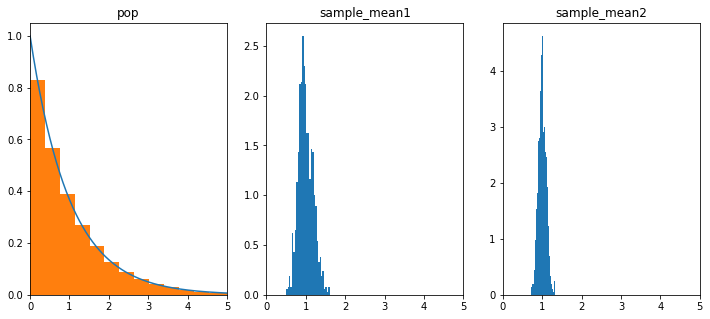

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
ax = axes[0]
x = np.linspace(0, 5, 300)
ax.plot(x, stats.expon.pdf(x))
ax.hist(pop, bins=30, density=True)
#ax.hist(stats.expon.pdf(x), bins=30, density=True)
ax.set_xlim(0, 5)
ax.set_title('pop')
ax = axes[1]
ax.hist(sample_mean1, bins=30, density=True)
ax.set_xlim(0, 5)
ax.set_title('sample_mean1')
ax = axes[2]
ax.hist(sample_mean2, bins=30, density=True)
ax.set_xlim(0, 5)
ax.set_title('sample_mean2')
ax.set_position
plt.show()

위의 그림에서 확인할 수 있듯이, 중심극한의 정리를 실험적으로 확인할 수 있었다. 
즉, "규모가 큰(n>=30) 단순 무작위 표본을 사용한다면 **모분포가 정규분포가 아니더라도** 표폰 평균의 분포는 **정규분포에 근사한다.**"라는 중심극한 정리대로 **모분포가 지수분포(exp)**인대로 **표본 평균의 분포인 sample_mean1과 sample_mean2** 정규 분포 모앙인 종모양으로 근사한다는 것을 위의 실험에서 확인 할 수 있었다. 그리고 N의 크기가 크면 점저 표본 평균의 분포의 분산(표준편차)가 작아지는 것을 확인할 수 있다, 그래고 **sample_mean2**는 **sample_mean1** 보다 더 모평균에 가까운 값일 뽑힐 확률이 높다 ($E(\bar x) = \mu$). 

#### (c) 이론적으로 계산했을 때 `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산은 무엇이 될 것이라고 추측하는가?

In [6]:
print("The mean of pop:", 1)
print("The variance of pop:", 1)
print("===========================")
print("The mean of sample_mean1:", 1)
print("The variance of sample_mean1:", (1/np.sqrt(30))**2)
print("===========================")
print("The mean of sample_mean2:", 1)
print("The variance of sample_mean2:", (1/np.sqrt(100))**2)

The mean of pop: 1
The variance of pop: 1
The mean of sample_mean1: 1
The variance of sample_mean1: 0.033333333333333326
The mean of sample_mean2: 1
The variance of sample_mean2: 0.010000000000000002


**Lecture 3에서는  𝜆=1 (default; exp(1))를 사용하였고 이 때 지수분포를 따르는 확률변수의 기대값과 분산은 1로 알려져있다.**와 같은 문제에서 이론적으로 아래의 식을 이용하여 표본평균의 기대값($E(\bar x)$) 오 표본 평균의 표준편차($\sigma_{\bar X}$)를 계산하면 위의 출력된 결과를 얻을 수 있다.

$$E(\bar X) = \mu$$
$$\sigma_{\bar X} = \frac{\sigma}{\sqrt n}$$

#### (d)  `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산을 계산하여 (c)에서 추측한 값과 가까운 값인지 확인하시오. 

In [29]:
print("The mean of pop:", pop.mean())
print("The variance of pop:", pop.var())
print("===========================")
print("The mean of sample_mean1:", sample_mean1.mean())
print("The variance of sample_mean1:", sample_mean1.var())
print("===========================")
print("The mean of sample_mean2:", sample_mean2.mean())
print("The variance of sample_mean2:", sample_mean2.var())

The mean of pop: 0.9954889043544147
The variance of pop: 1.0061882457777718
The mean of sample_mean1: 0.9954889043544146
The variance of sample_mean1: 0.03371049718913247
The mean of sample_mean2: 1.0061199306972202
The variance of sample_mean2: 0.009085849542480231


실제로 pop, sample_mean1, sample_mean2으로 평균 및 분산을 계산한 결과 **이론적으로 계산한 결과에 근사하는 것**을 확인 할 수 있다. 

#### 2. 	개인이 지불하는 자동차 보험료의 연간 평균은 687달러이다. 이 값을 모집단 평균으로 하고 모집단의 표준편차가 230달러이다. 45개의 자동차 보험계약을 생각해보자. 45개 보험료의 평균이 모집단 평균의 +-25달러 이내에 있을 확률은 얼마인가?


In [7]:
from scipy.stats import norm
mean = 687
sd = 230/np.sqrt(45)
a = norm.cdf(687+25, loc=mean, scale=sd)
b = norm.cdf(687-25, loc=mean, scale=sd)
a-b

0.5340916787127394

위의 확률로 45개의 보험표의 평균이 모집단 평균의 +-25달러 존재한다.

#### 3. `airbnb.csv` 데이터셋을 사용하여 샌프란시스코 전체 리스팅의 `reviews_per_month`의 평균을 95% 신뢰구간으로 추정하고 해석하시오. 

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import os 

import seaborn as sns
import matplotlib.pylab as plt
#print("Current location:", os.getcwd())
# data가 저장되어 있는 경로로 각자 수정 필요
data = pd.read_csv("C:\\Users\\nlpla\\Downloads\\airbnb.csv")
sample = data.reviews_per_month
sample_mean = sample.mean()
sample_sd = np.sqrt(sample.var())
print("reviews_per_months' shape:", sample.shape)
print("reviews_per_months' mean:", sample_mean)
print("reviews_per_months' sd:", sample_sd)

reviews_per_months' shape: (6105,)
reviews_per_months' mean: 1.8882506142506121
reviews_per_months' sd: 2.089904214530151


In [68]:
n=6105
alpha = 0.05

In [79]:
stats.t.ppf(1-alpha/2, n-1)

1.9603527023808762

In [80]:
ci_lower = sample_mean - stats.t.ppf(1-alpha/2, n-1)*sample_sd/np.sqrt(n)
ci_upper = sample_mean + stats.t.ppf(1-alpha/2, n-1)*sample_sd/np.sqrt(n)
print("lower bound:", ci_lower)
print("upper bound:", ci_upper)

lower bound: 1.835816037911685
upper bound: 1.9406851905895393


유의수준을 0.05로 95%로 신뢰구간 측정한다면 
위의 결과로 부터 모평균($\mu$)이 **lower bound** 와 **upper bound** 사이에 있을 가능성이 **95%** 이다
즉, **P(1.835816037911685 < $\mu$ < 1.9406851905895393) = 0.95**